<a href="https://colab.research.google.com/github/AbbyHoyt/KWK-Goldman-Sachs-ML-Final-Project/blob/main/Abby_Hoyt_KWK_Machine_Learning_x_Finance_Challenge_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Loan Approval According to Demographics and Financial Standing
---

## ⚠️ Agreement Not to Use AI Tools in This Text Cell

By completing this text cell, you confirm that **you did not use any AI tools or large language models (LLMs) to generate text, code, or analysis for its content**.  

*Purpose:* This ensures that your insights, reasoning, and work in this section are fully your own.  

**Please write your responses/code manually.**

-----------------

## Research Question / Problem Statement

How do demographics and financial standing affect the likelihood of an individual getting a home loan approved?

-----------------

## List of Datasets

**Home Loan Approval by Rushikesh Konapure**

* **Source:** The dataset is available on Kaggle [here](https://www.kaggle.com/datasets/rishikeshkonapure/home-loan-approval?select=loan_sanction_test.cs).

* **Brief Description:** The dataset includes information about loan applicant demographics (such as age, gender, marital status, education level, number of dependents, etc.) as well as financial information.

* **Why I Chose This Dataset:** I chose to use this dataset because it had a high usability score, the data was available in a CSV format, and the number of features/columns available seemed large enough to draw valuable conclusions without being too difficult to work with.

-----------------

## Summary of Dataset Use

**Model 1: Linear Regression**

*Loan Amount vs. Applicant Income, Loan Amount Term vs. Applicant Income, Loan Approval vs. Loan Amount,  Loan Approval vs. Applicant Income*

*   **Model Type**: Linear regression.

*   **Dataset(s) Used**: Home Loan Approval by Rushikesh Konapure.

*   **Metric(s) Used**: Mean squared error (MSE) and R^2 score.

*   **Key Insight(s)**: The correlation matrix I created as part of my exploratory data analysis expressed no strong correlations (positive or negative) between most features. Due to the weak linear relationships between variables, my linear regression models had a hard time accurately predicting loan amount and loan term from an applicant's income as well as loan approval from an applicant's income or loan amount. I tried scaling my features using MinMaxScaler and StandardScaler but neither improved the models' accuracy much. In hindsight, this makes sense - a linear regression model is not the best choice for a dataset that has features with little linear relationship. According to this dataset, an applicant's income only somewhat determines the loan amount or loan term they will apply for. Additionally, loan approval has a slight negative correlation with both applicant income and loan amount. As these numbers rise, loan approval rates drop.

*   **AI/LLM Use (If Any)**: N/A.

<br>

**Model 2: Decision Tree Regressor**

*Predicting Loan Approval From Many Features, Predicting Loan Approval From Financial Features, Predicting Loan Approval From Demographic Features*

*   **Model Type**: Decision tree regressor.

*   **Dataset(s) Used**: Home Loan Approval by Rushikesh Konapure.

*   **Metric(s) Used**: Feature importance, mean squared error (MSE), root mean square error (RMSE), mean absolute error (MAE), and R^2 score.

*   **Key Insight(s)**: Credit history has the highest feature importance overall when predicting whether or not an applicant's loan will be approved. Similarly, credit history is the most important financial features when predicting loan approval. When considering just demographic features, an applicant's education status is the most important feature. Marital status, property type (urban, semiurban, or rural), gender, and self-employment status all have some influence on loan approval. All of my decision tree regressor models had varying MSE, RMSE, MAE, and R^2 scores, likely due to the features in my dataset having low correlation with one another. However, these models gave me good insight into feature importance, and I was able to learn what factors most impact whether a home loan is approved or not.

*   **AI/LLM Use (If Any)**: N/A.

-----------------

## Overall AI/LLM Usage

I did not use any AI or LLM tools during the creation of this project. All text and code in this notebook and on my slideshow presentation was written by me.

-----------------

## Results

Overall, my linear regression and decision tree regressor models performed somewhat poorly since the features in the dataset I selected had little correlation (positive or negative) with one another per my correlation matrix. Since the variables didn't have strong relationships, it was difficult for the models to learn patterns and make accurate predictions. Despite the lack of correlation between features, I was able to gain insights about what features were most important when predicting whether a home loan was approved or not. Credit history is the most influential factor overall when determining loan amount. The most important demographic/non-financial feature was an applicant's education level. Factors like gender, marital status, property type, and self-employment status were somewhat important in determining loan approval. Applicant income, co-applicant income, and loan amount have little influence on loan approval rates.

-----------------

## Conclusion and Recommendations

Many of the features offered in the dataset I selected had little correlation with one another, which made it difficult to train my linear regression and decision tree regressor models to recognize patterns and predict outcomes. While my models had somewhat low accuracy scores, I still gained valuable insight in regards to what features were most influential in determining if an applicant's loan was approved or not. I would be interested in exploring other machine learning models that prominently consider non-linear relationships between features. In the future, I would also want to look into how other factors (such as race, age, geographic location, etc.) affect home loan approvals. Moreover, it could be interesting to see how home loan approval has changed over time or consider what home loan approval will look like in the future.

-----------------

## References
**1. Rename Columns in Pandas Dataframe From GeeksforGeeks**

* **Source:** https://www.geeksforgeeks.org/pandas/how-to-rename-columns-in-pandas-dataframe/
* **Use:** Referenced example code showing how to change the name case of  columns in a pandas dataframe.

**2. Display/Render an HTML File Inside Jupyter Notebook on Google Colab Platform From StackOverflow**

* **Source:** https://stackoverflow.com/questions/51576756/display-render-an-html-file-inside-jupyter-notebook-on-google-colab-platform
* **Use:** Referenced example code showing how to use HTML code inside of a Jupyter notebook file.

**3. Color Palette From Coolors**

* **Source:** https://colorhunt.co/palette/f6b1ce1581bf3db6b1cce5cf
* **Use:** Used HEX codes for colors in HTML sections of code.

**4. List of Named Colors From Matplotlib**

* **Source:** https://matplotlib.org/3.1.1/gallery/color/named_colors.html
* **Use:** Used color names to style Matplotlib graphs.

**5. DecisionTreeRegressor From scikit-learn**

* **Source:** https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
* **Use:** Consulted documentation to learn default parameter values to use as a starting point when building my decision tree models.

**6. Implementing Decision Tree Regression using Scikit-Learn From GeeksforGeeks**

* **Source:** https://www.geeksforgeeks.org/machine-learning/python-decision-tree-regression-using-sklearn/
* **Use:** Read about what a Decision Tree Regressor is to understand how it differs from a Decision Tree Classifier. Looked at sample Decision Tree Regressor output and results.

**7. StandardScaler, MinMaxScaler and RobustScaler Techniques - ML From GeeksforGeeks**

* **Source:** https://www.geeksforgeeks.org/machine-learning/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/
* **Use:** Referenced to learn about implementation for different types of scalers. Read about feature scaling and data standardization techniques.

**8. pandas: Get the Number of Rows, Columns, Elements (Size) in DataFrame From note.nkmk.me**

* **Source:** https://note.nkmk.me/en/python-pandas-len-shape-size/
* **Use:** Referenced how to get the number of rows and columns in a pandas DataFrame using df.shape.

**9. Can I Expect Good Results Having Low Correlation Attributes? From Data Science Stack Exchange**

* **Source:** https://datascience.stackexchange.com/questions/81762/can-i-expect-good-results-having-low-correlation-attributes
* **Use:** Looked into how accurate a machine learning model can be when features in the dataset have low correlation with one another. Found that correlation matrices only express linear relationships. Looking into things like non-linear correlation or feature importance could be good for building ML models with datasets in which features have low linear correlation with one another.

**10. Machine Learning: What if a Feature Has No Correlation With Label (Target)? From StackOverflow**

* **Source:** https://stackoverflow.com/questions/45453342/machine-learning-what-if-any-one-of-feature-have-no-correlation-with-labeltarg
* **Use:** Learned that even though two variables have no linear correlation, they may have a non-linear relationship. Using non-linear  models can help discover relationships and recognize patterns between these sorts of variables.

**11. Mean Squared Error From GeeksforGeeks**

* **Source:** https://www.geeksforgeeks.org/maths/mean-squared-error/
* **Use:** Looked at what a "good" MSE score is, how to interpret MSE scores in different contexts, how to improve MSE scores (choosing the most relevant features, etc.), and what the RMSE variant is to better understand my results.

---

In [254]:
import IPython
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Load Data and Mount to Google Drive</h1>")

In [255]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from scipy import stats

# df = pd.read_csv("/content/drive/My Drive/KWK_ML/loan_sanction_test.csv")
df = pd.read_csv("/content/drive/My Drive/KWK_ML/loan_sanction_train.csv")
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [257]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Rename Columns for Name Case Consistency</h3>")

In [258]:
df = df.rename(columns={'Loan_ID': 'LoanID', 'Self_Employed': 'SelfEmployed', 'Loan_Amount_Term': 'LoanAmountTerm', 'Credit_History': 'CreditHistory', 'Property_Area': 'PropertyArea', 'Loan_Status': 'LoanStatus'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [259]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Exploratory Data Analysis</h1>")

In [260]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Central Tendency of Numeric Features</h3>")

In [261]:
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory"]

for col in cols:
  print(f"{col}")

  # Calculate mean.
  mean = df[col].mean()
  print(f"  * Mean: {mean}")

  # Calculate median.
  median = df[col].median()
  print(f"  * Median: {median}")

  # Calculate mode.
  mode_result = stats.mode(df[col], keepdims = True)
  mode = mode_result.mode[0]
  mode_count = mode_result.count[0]
  print(f"  * Mode: {mode} appeared {mode_count} times")

  print()

ApplicantIncome
  * Mean: 5403.459283387622
  * Median: 3812.5
  * Mode: 2500 appeared 9 times

CoapplicantIncome
  * Mean: 1621.2457980271008
  * Median: 1188.5
  * Mode: 0.0 appeared 273 times

LoanAmount
  * Mean: 146.41216216216216
  * Median: 128.0
  * Mode: nan appeared 22 times

LoanAmountTerm
  * Mean: 342.0
  * Median: 360.0
  * Mode: 360.0 appeared 512 times

CreditHistory
  * Mean: 0.8421985815602837
  * Median: 1.0
  * Mode: 1.0 appeared 475 times



In [262]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Spread and Variation of Numeric Features</h3>")

In [263]:
cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory"]

for col in cols:
  print(f"{col}")

  # Calculate minimum.
  min = df[col].min()
  print(f"  * Minimum: {min}")

  # Calculate maximum.
  max = df[col].max()
  print(f"  * Maximum: {max}")

  # Calculate range.
  range = max - min
  print(f"  * Range: {range}")

  # Calculate interquartile range (IQR).
  quartile_3 = df[col].quantile(0.75)
  quartile_1 = df[col].quantile(0.25)
  iqr = quartile_3 - quartile_1
  print(f"  * IQR: {iqr}")

  # Calculate standard deviation.
  standard_deviation = df[col].std()
  print(f"  * Standard Deviation: {standard_deviation}")

  print()

ApplicantIncome
  * Minimum: 150
  * Maximum: 81000
  * Range: 80850
  * IQR: 2917.5
  * Standard Deviation: 6109.041673387174

CoapplicantIncome
  * Minimum: 0.0
  * Maximum: 41667.0
  * Range: 41667.0
  * IQR: 2297.25
  * Standard Deviation: 2926.2483692241917

LoanAmount
  * Minimum: 9.0
  * Maximum: 700.0
  * Range: 691.0
  * IQR: 68.0
  * Standard Deviation: 85.58732523570545

LoanAmountTerm
  * Minimum: 12.0
  * Maximum: 480.0
  * Range: 468.0
  * IQR: 0.0
  * Standard Deviation: 65.12040985461256

CreditHistory
  * Minimum: 0.0
  * Maximum: 1.0
  * Range: 1.0
  * IQR: 0.0
  * Standard Deviation: 0.3648783192364049



In [264]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Visualizations of Spread</h3>")

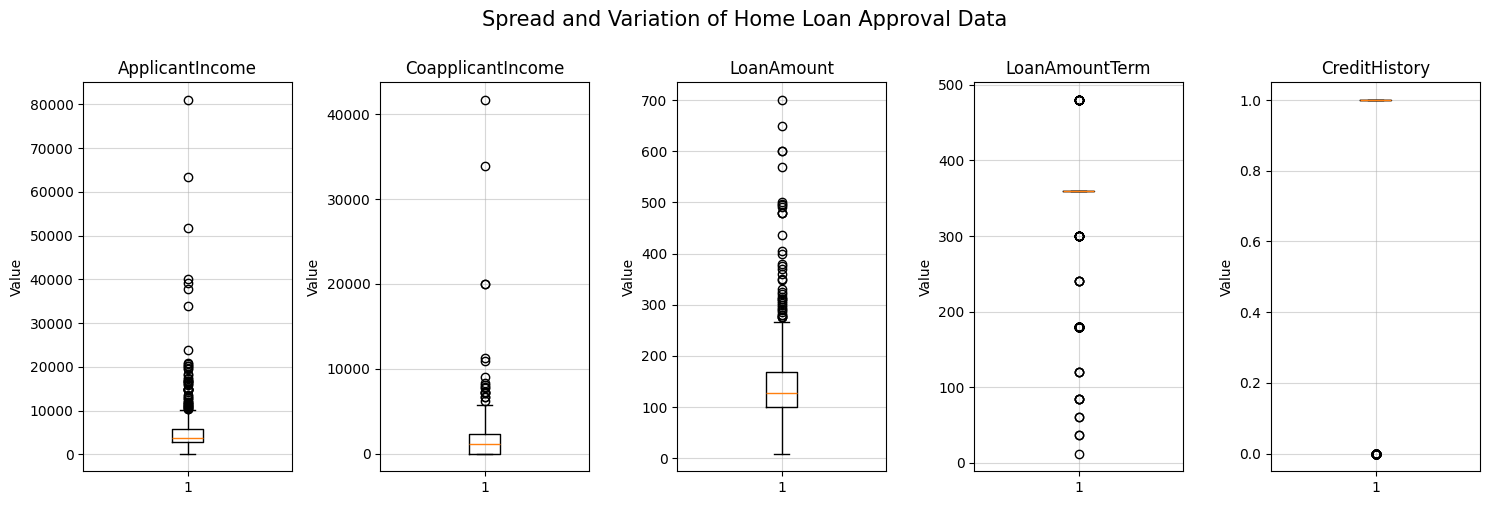

In [265]:
import matplotlib.pyplot as plt

cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory"]

fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))

# Create a boxplot for each column.
for i, col in enumerate(cols):
  axes[i].boxplot(df[col].dropna(), vert = True)
  axes[i].set_title(col)
  axes[i].set_ylabel("Value")
  axes[i].grid(True, linestyle = "-", alpha = 0.5)

# Display boxplots.
plt.suptitle("Spread and Variation of Home Loan Approval Data", fontsize = 15, y = 1)
plt.tight_layout()
plt.show()

In [266]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Correlation Matrix</h3>")

In [267]:
# Create LoanApproval numeric feature.
print(set(df['LoanStatus'].values))
df['LoanApproval'] = df['LoanStatus'].map({'N': 0, 'Y': 1})

cols = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "LoanAmountTerm", "CreditHistory", "LoanApproval"]

# Display correlation matrix.
df[cols].corr()

{'Y', 'N'}


,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,LoanApproval
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
LoanAmountTerm,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
CreditHistory,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
LoanApproval,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


---

In [268]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Clean Data</h1>")

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
 13  LoanApproval       614 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB


In [270]:
# Fill missing numeric values with median.
median_loan_amount = df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(median_loan_amount)

median_loan_amount_term = df['LoanAmountTerm'].median()
df['LoanAmountTerm'] = df['LoanAmountTerm'].fillna(median_loan_amount_term)

median_credit_history = df['CreditHistory'].median()
df['CreditHistory'] = df['CreditHistory'].fillna(median_credit_history)

# Fill missing non-numeric values with mode.
mode_gender = df['Gender'].mode()[0]
df['Gender'] = df['Gender'].fillna(mode_gender)

mode_dependents = df['Dependents'].mode()[0]
df['Dependents'] = df['Dependents'].fillna(mode_dependents)

mode_self_employed = df['SelfEmployed'].mode()[0]
df['SelfEmployed'] = df['SelfEmployed'].fillna(mode_self_employed)

mode_property_area = df['PropertyArea'].mode()[0]
df['PropertyArea'] = df['PropertyArea'].fillna(mode_property_area)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   LoanAmountTerm     614 non-null    float64
 10  CreditHistory      614 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
 13  LoanApproval       614 non-null    int64  
dtypes: float64(4), int64(2), object(8)
memory usage: 67.3+ KB


In [271]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Model #1: Linear Regression</h1>")

In [272]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Loan Amount vs. Applicant Income Model</h3>")

Coefficient (Slope): 0.007892392303906218
Intercept: 104.61780522545516
Mean Squared Error: 3035.5594963663375
R^2 Score: 0.4423741529817312



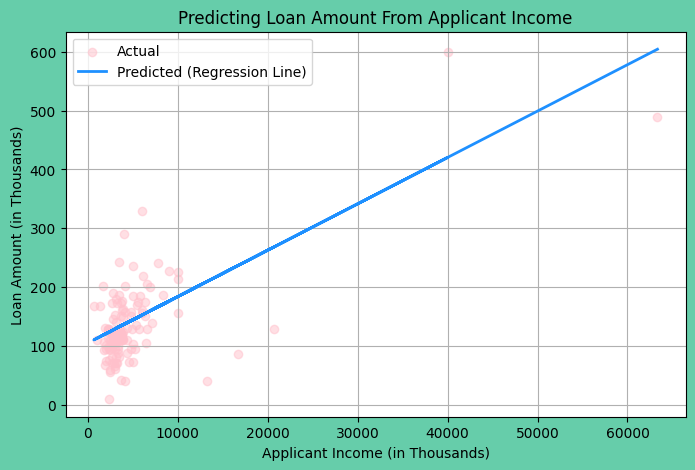

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features.
X = df[['ApplicantIncome']]

# Define target.
y = df['LoanAmount']

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions.
y_prediction = model.predict(X_test)

# Evaluate model performance.
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print()

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = 'mediumaquamarine')
plt.scatter(X_test, y_test, color = 'pink', alpha = 0.5, label = 'Actual')
plt.plot(X_test, y_prediction, color = 'dodgerblue', linewidth = 2, label = 'Predicted (Regression Line)')
plt.title("Predicting Loan Amount From Applicant Income")
plt.xlabel("Applicant Income (in Thousands)")
plt.ylabel("Loan Amount (in Thousands)")
plt.legend()
plt.grid(True)
plt.show()

In [274]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Loan Amount Term vs. Applicant Income Model</h3>")

Coefficient (Slope): 0.0002764947317604288
Intercept: 339.24433158905174
Mean Squared Error: 2923.9755008061634
R^2 Score: -0.05152243401785195



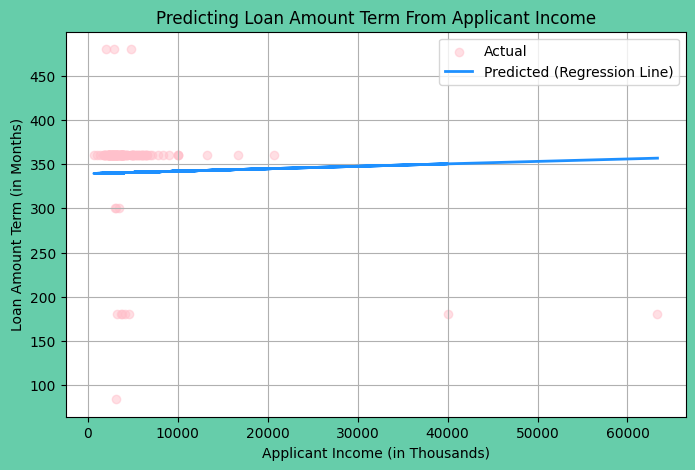

In [275]:
# Define features.
X = df[['ApplicantIncome']]

# Define target.
y = df['LoanAmountTerm']

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions.
y_prediction = model.predict(X_test)

# Evaluate model performance.
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print()

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = 'mediumaquamarine')
plt.scatter(X_test, y_test, color = 'pink', alpha = 0.5, label = 'Actual')
plt.plot(X_test, y_prediction, color = 'dodgerblue', linewidth = 2, label = 'Predicted (Regression Line)')
plt.title("Predicting Loan Amount Term From Applicant Income")
plt.xlabel("Applicant Income (in Thousands)")
plt.ylabel("Loan Amount Term (in Months)")
plt.legend()
plt.grid(True)
plt.show()

In [276]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Loan Approval vs. Loan Amount Model</h3>")

Coefficient (Slope): -0.00020937102863918087
Intercept: 0.7275343980505309
Mean Squared Error: 0.22969420640715366
R^2 Score: -0.010187107190066325



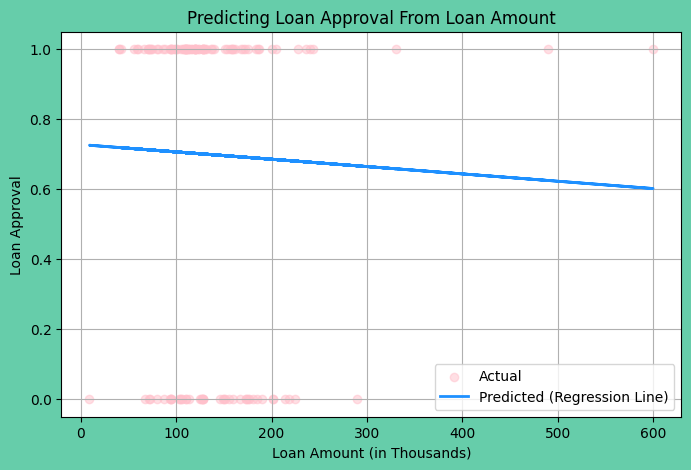

In [277]:
# Define features.
X = df[['LoanAmount']]

# Define target.
y = df['LoanApproval']

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions.
y_prediction = model.predict(X_test)

# Evaluate model performance.
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print()

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = 'mediumaquamarine')
plt.scatter(X_test, y_test, color = 'pink', alpha = 0.5, label = 'Actual')
plt.plot(X_test, y_prediction, color = 'dodgerblue', linewidth = 2, label = 'Predicted (Regression Line)')
plt.title("Predicting Loan Approval From Loan Amount")
plt.xlabel("Loan Amount (in Thousands)")
plt.ylabel("Loan Approval")
plt.legend()
plt.grid(True)
plt.show()

In [278]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Loan Approval vs. Applicant Income Model</h3>")

Coefficient (Slope): -1.622325614011262e-06
Intercept: 0.7054647611438085
Mean Squared Error: 0.23016368529685888
R^2 Score: -0.012251858969819285



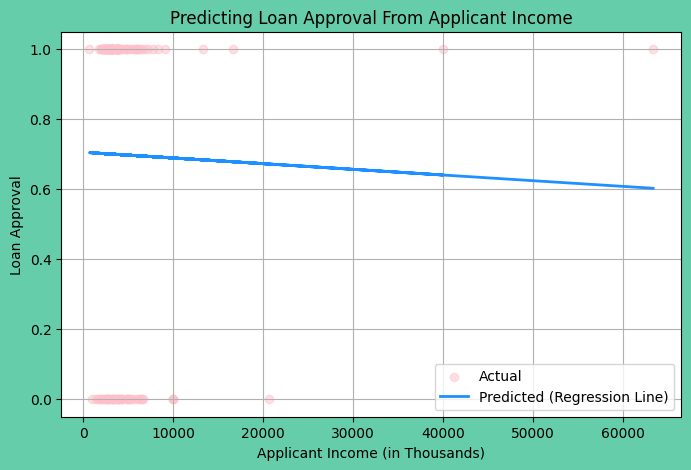

In [279]:
# Define features.
X = df[['ApplicantIncome']]

# Define target.
y = df['LoanApproval']

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Train the model.
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions.
y_prediction = model.predict(X_test)

# Evaluate model performance.
mse = mean_squared_error(y_test, y_prediction)
r2 = r2_score(y_test, y_prediction)

print(f"Coefficient (Slope): {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print()

# Visualize results.
plt.figure(figsize = (8, 5), facecolor = 'mediumaquamarine')
plt.scatter(X_test, y_test, color = 'pink', alpha = 0.5, label = 'Actual')
plt.plot(X_test, y_prediction, color = 'dodgerblue', linewidth = 2, label = 'Predicted (Regression Line)')
plt.title("Predicting Loan Approval From Applicant Income")
plt.xlabel("Applicant Income (in Thousands)")
plt.ylabel("Loan Approval")
plt.legend()
plt.grid(True)
plt.show()

In [280]:
IPython.display.HTML("<h1 style='color: #1581BF; text-align: center; font-weight: bold; background-color: #F6B1CE; padding: 10px; border-radius: 10px;'>Model #2: Decision Tree</h1>")

In [281]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Create New Columns With Mapped Numerical Values</h3>")

In [282]:
print("Categorical Column Values Before Converting to Mapped Numerical Values:")

# Create a Gender_Female column.
print(set(df['Gender'].values))
df['Gender_Female'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Create a Married_Yes column.
print(set(df['Married'].values))
df['Married_Yes'] = df['Married'].map({'No': 0, 'Yes': 1})

# Create an Education_Graduate column.
print(set(df['Education'].values))
df['Education_Graduate'] = df['Education'].map({'Not Graduate': 0, 'Graduate': 1})

# Create a SelfEmployed_Yes column.
print(set(df['SelfEmployed'].values))
df['SelfEmployed_Yes'] = df['SelfEmployed'].map({'No': 0, 'Yes': 1})

# Create an UrbanSemiurban_Yes column.
print(set(df['PropertyArea'].values))
df['UrbanSemiurban_Yes'] = df['PropertyArea'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 1})

print()

# Display updated dataframe with new columns.
df.info()

Categorical Column Values Before Converting to Mapped Numerical Values:
{'Female', 'Male'}
{'Yes', 'No', nan}
{'Not Graduate', 'Graduate'}
{'Yes', 'No'}
{'Rural', 'Urban', 'Semiurban'}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LoanID              614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    object 
 5   SelfEmployed        614 non-null    object 
 6   ApplicantIncome     614 non-null    int64  
 7   CoapplicantIncome   614 non-null    float64
 8   LoanAmount          614 non-null    float64
 9   LoanAmountTerm      614 non-null    float64
 10  CreditHistory       614 non-null    float64
 11  PropertyArea        614 non-null    object 
 12  LoanStatus        

In [283]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Decision Tree Model for Predicting Loan Approval From Many Features</h3>")

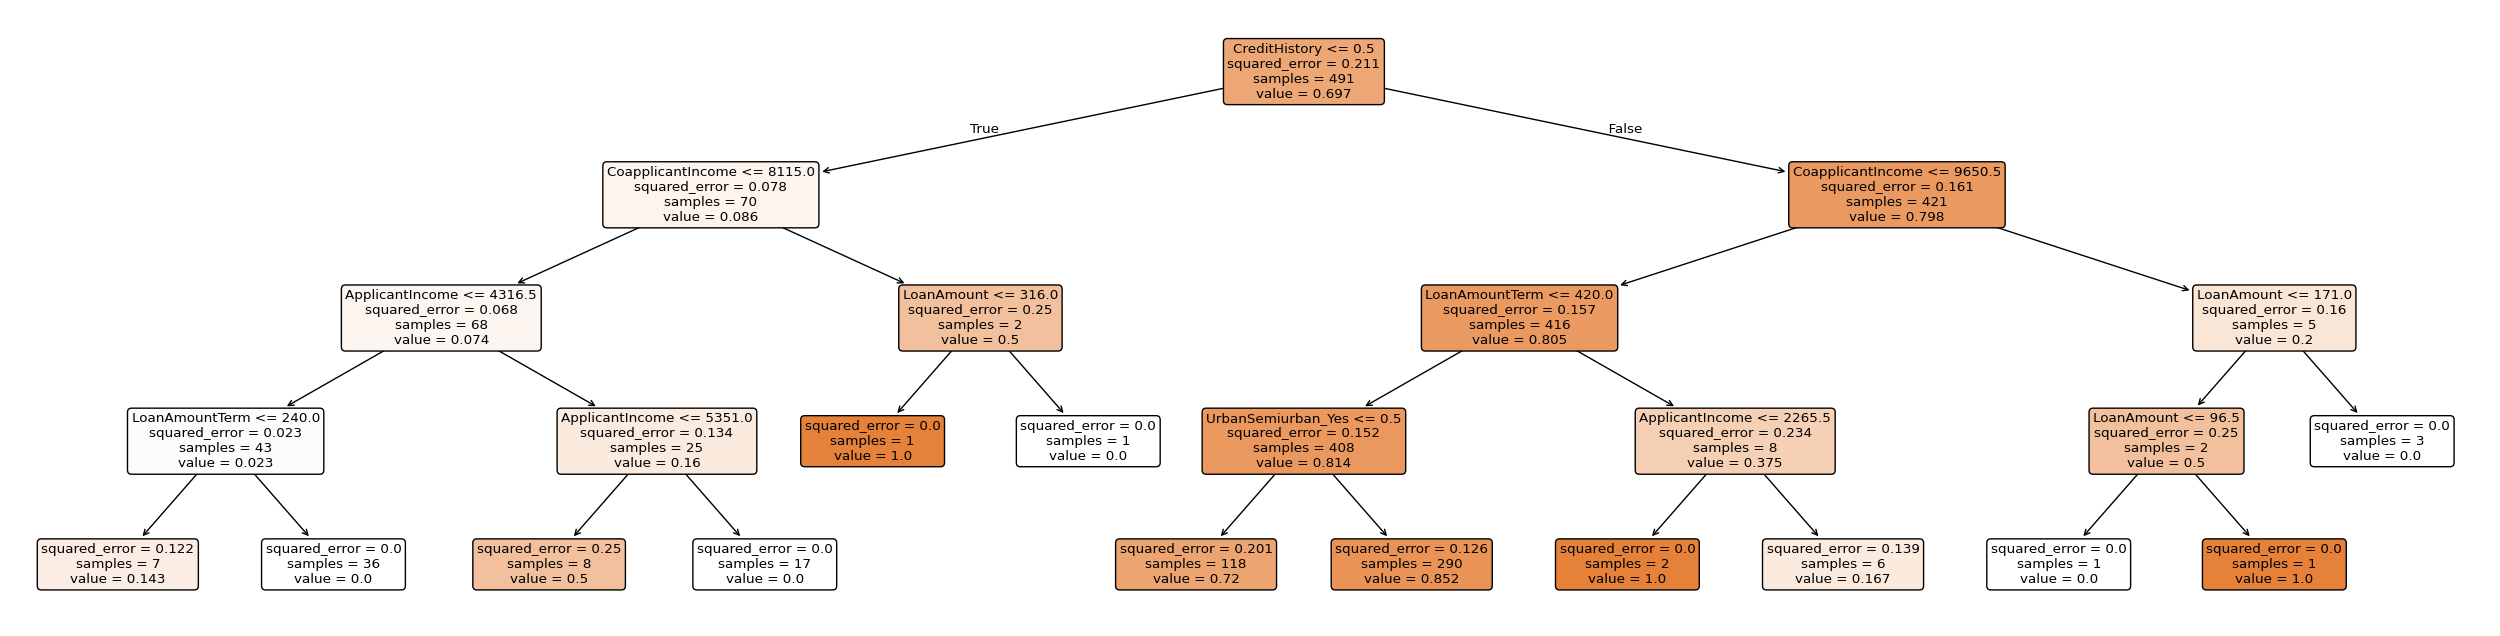


Feature Importance:
               Feature  Importance
6       CreditHistory    0.767285
8     ApplicantIncome    0.067944
9   CoapplicantIncome    0.054498
4      LoanAmountTerm    0.041055
7  UrbanSemiurban_Yes    0.036470
5          LoanAmount    0.032747
1  Education_Graduate    0.000000
0       Gender_Female    0.000000
2    SelfEmployed_Yes    0.000000
3         Married_Yes    0.000000

Accuracy for Training Data:
  * Mean Squared Error: 0.13052097874172838
  * Root Mean Squared Error: 0.3612768726914697
  * Mean Absolute Error: 0.26104195748345677
  * R^2 Score: 0.38250857419768003

Accuracy for Testing Data:
  * Mean Squared Error: 0.18369179810044922
  * Root Mean Squared Error: 0.4285928115361353
  * Mean Absolute Error: 0.3177203234836055
  * R^2 Score: 0.1921298798076463


In [284]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Features to use in the model.
X = df[["Gender_Female",
        "Education_Graduate",
        "SelfEmployed_Yes",
        "Married_Yes",
        "LoanAmountTerm",
        "LoanAmount",
        "CreditHistory",
        "UrbanSemiurban_Yes",
        "ApplicantIncome",
        "CoapplicantIncome"]]
y = df["LoanApproval"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the model.
model = DecisionTreeRegressor(
    max_depth = 4,
    # min_samples_split = 2,
    # min_samples_leaf = 1,
    random_state = 42
)
model.fit(X_train, y_train)

# Visualize the decison tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.show()

# Determine and display feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by = "Importance", ascending = False)

print("\nFeature Importance:\n", feature_importance)

# Evaluate decision tree accuracy on the training data.
print("\nAccuracy for Training Data:")
y_pred_train = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print(f"  * Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"  * Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_train, y_pred_train)
print(f"  * Mean Absolute Error: {mae}")

r2 = r2_score(y_train, y_pred_train)
print(f"  * R^2 Score: {r2}")

# Evaluate decision tree accuracy on the testing data.
print("\nAccuracy for Testing Data:")
y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
print(f"  * Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"  * Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred_test)
print(f"  * Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred_test)
print(f"  * R^2 Score: {r2}")

In [285]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Decision Tree Model for Predicting Loan Approval From Financial Features</h3>")

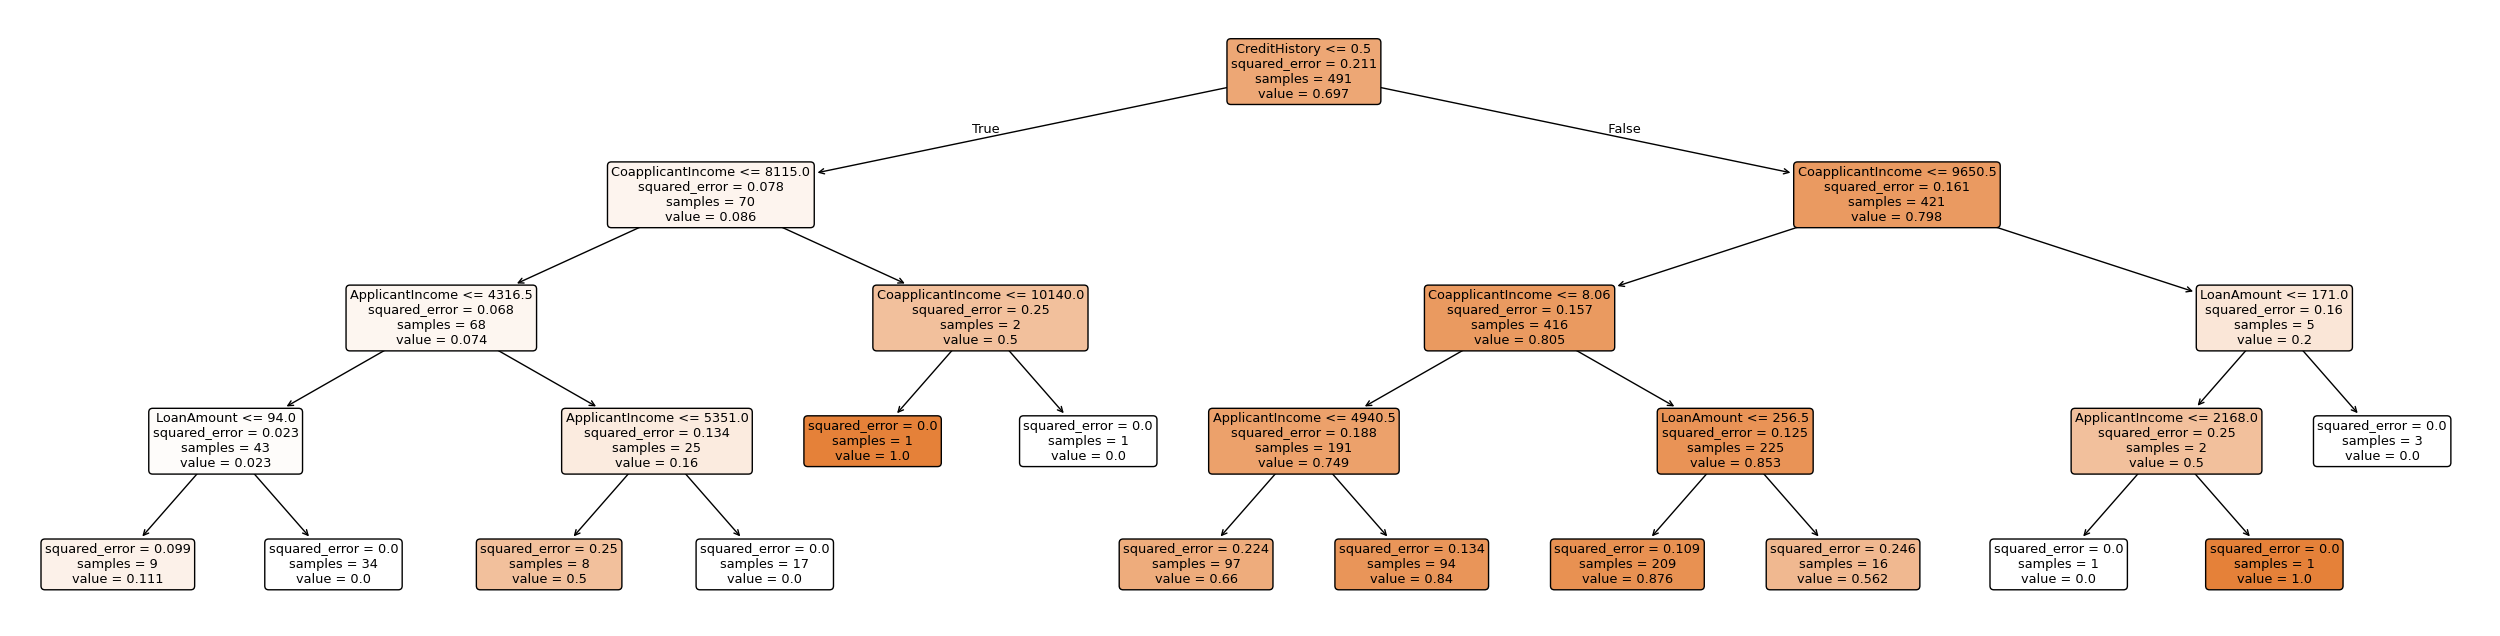


Feature Importance:
              Feature  Importance
0      CreditHistory    0.765082
2  CoapplicantIncome    0.095313
1    ApplicantIncome    0.093267
3         LoanAmount    0.046337

Accuracy for Training Data:
  * Mean Squared Error: 0.1302882239982391
  * Root Mean Squared Error: 0.3609546010210136
  * Mean Absolute Error: 0.2605764479964782
  * R^2 Score: 0.38360973096040896

Accuracy for Testing Data:
  * Mean Squared Error: 0.18357506509874655
  * Root Mean Squared Error: 0.42845660818657766
  * Mean Absolute Error: 0.3144696569164696
  * R^2 Score: 0.1926432674770533


In [286]:
# Features to use in the model.
X = df[["CreditHistory",
        "ApplicantIncome",
        "CoapplicantIncome",
        "LoanAmount"]]
y = df["LoanApproval"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the model.
model = DecisionTreeRegressor(
    max_depth = 4,
    random_state = 42
)
model.fit(X_train, y_train)

# Visualize the decison tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.show()

# Determine and display feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by = "Importance", ascending = False)

print("\nFeature Importance:\n", feature_importance)

# Evaluate decision tree accuracy on the training data.
print("\nAccuracy for Training Data:")
y_pred_train = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print(f"  * Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"  * Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_train, y_pred_train)
print(f"  * Mean Absolute Error: {mae}")

r2 = r2_score(y_train, y_pred_train)
print(f"  * R^2 Score: {r2}")

# Evaluate decision tree accuracy on the testing data.
print("\nAccuracy for Testing Data:")
y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
print(f"  * Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"  * Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred_test)
print(f"  * Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred_test)
print(f"  * R^2 Score: {r2}")

In [287]:
IPython.display.HTML("<h3 style='background-color: #CCE5CF; padding: 10px; border: 2px solid #3DB6B1; border-radius: 10px; color: #3DB6B1;'>Train and Evaluate Decision Tree Model for Predicting Loan Approval From Demographic Features</h3>")

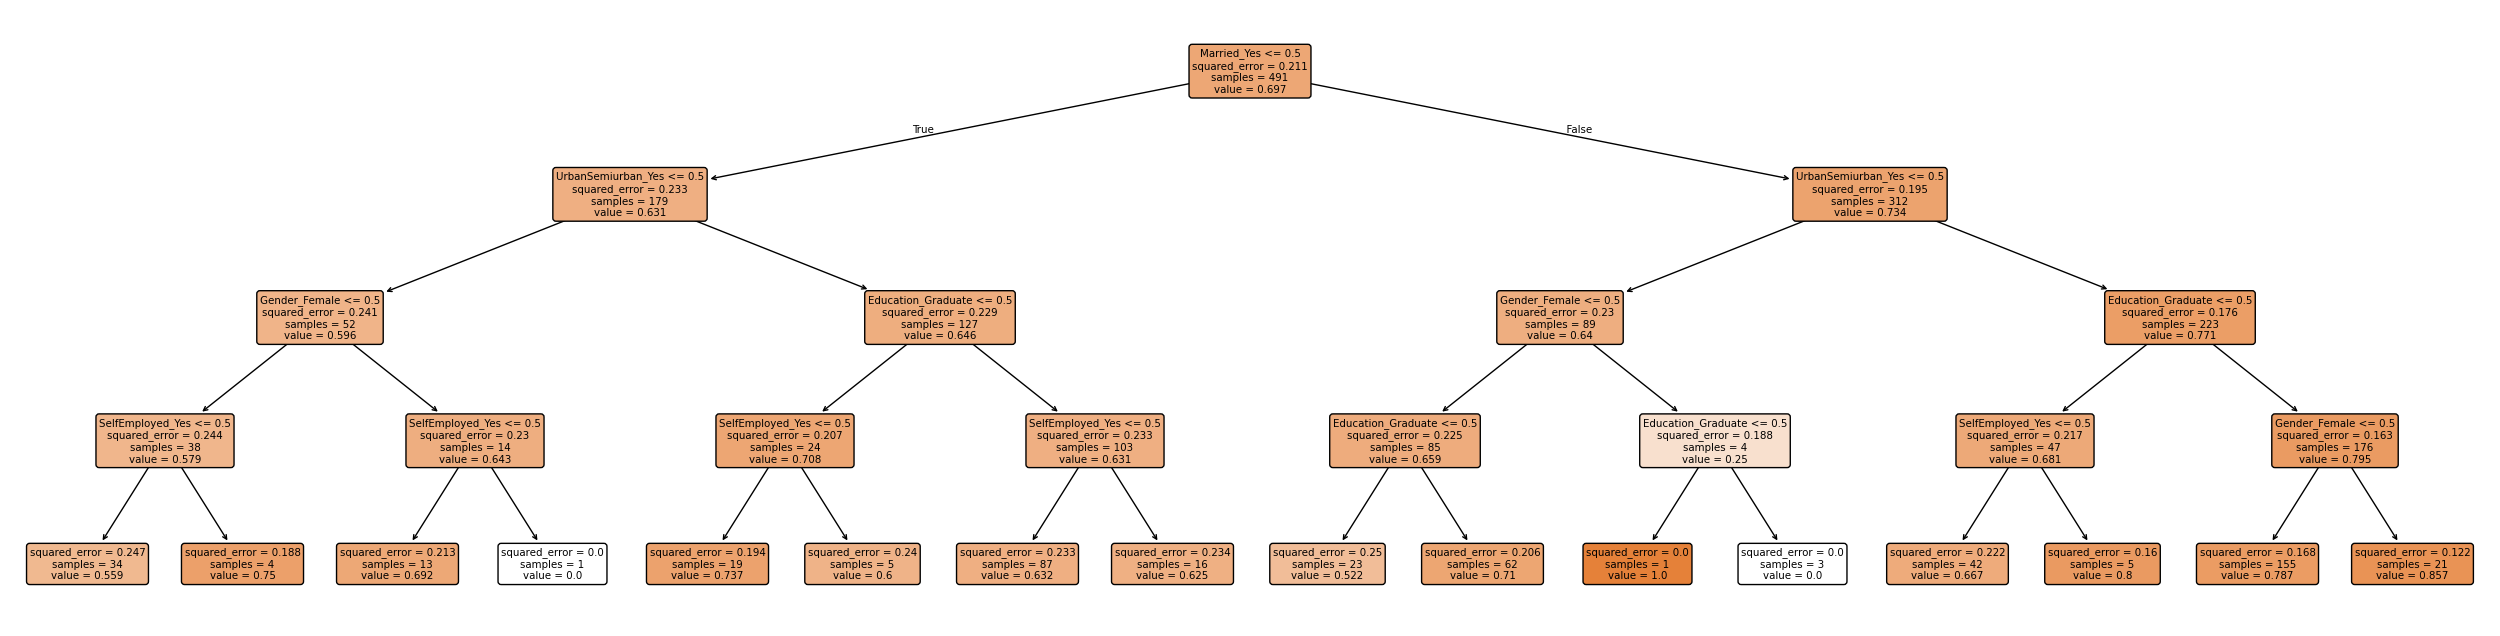


Feature Importance:
               Feature  Importance
1  Education_Graduate    0.334003
3         Married_Yes    0.205871
4  UrbanSemiurban_Yes    0.202470
0       Gender_Female    0.132339
2    SelfEmployed_Yes    0.125316

Accuracy for Training Data:
  * Mean Squared Error: 0.19950704425766397
  * Root Mean Squared Error: 0.44666211419557844
  * Mean Absolute Error: 0.39901408851532794
  * R^2 Score: 0.056137255451903734

Accuracy for Testing Data:
  * Mean Squared Error: 0.226509735517722
  * Root Mean Squared Error: 0.4759303893614296
  * Mean Absolute Error: 0.4235999983832051
  * R^2 Score: 0.0038180846954603


In [288]:
# Features to use in the model.
X = df[["Gender_Female",
        "Education_Graduate",
        "SelfEmployed_Yes",
        "Married_Yes",
        "UrbanSemiurban_Yes"]]
y = df["LoanApproval"]

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

# Train the model.
model = DecisionTreeRegressor(
    max_depth = 4,
    random_state = 42
)
model.fit(X_train, y_train)

# Visualize the decison tree.
plt.figure(figsize = (32, 8))
plot_tree(
    model,
    feature_names = X.columns,
    filled = True,
    rounded = True
)
plt.show()

# Determine and display feature importance.
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by = "Importance", ascending = False)

print("\nFeature Importance:\n", feature_importance)

# Evaluate decision tree accuracy on the training data.
print("\nAccuracy for Training Data:")
y_pred_train = model.predict(X_train)

mse = mean_squared_error(y_train, y_pred_train)
print(f"  * Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"  * Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_train, y_pred_train)
print(f"  * Mean Absolute Error: {mae}")

r2 = r2_score(y_train, y_pred_train)
print(f"  * R^2 Score: {r2}")

# Evaluate decision tree accuracy on the testing data.
print("\nAccuracy for Testing Data:")
y_pred_test = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_test)
print(f"  * Mean Squared Error: {mse}")

rmse = np.sqrt(mse)
print(f"  * Root Mean Squared Error: {rmse}")

mae = mean_absolute_error(y_test, y_pred_test)
print(f"  * Mean Absolute Error: {mae}")

r2 = r2_score(y_test, y_pred_test)
print(f"  * R^2 Score: {r2}")